In [1]:
import tensorflow as tf

C:\Users\Jaideep\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
tf.__version__

'1.5.0'

In [2]:
import numpy as np

In [3]:
from numpy import genfromtxt

In [4]:
import pandas as pd

In [38]:
df=pd.read_csv('C:\\Users\\Jaideep\\Desktop\\Vitreos\\proj 2\\OneDrive_1_6-27-2019\\nn_data.csv')

In [39]:
df.head()

,mo9_nitrates_Cost,mo12_Months.Since.Seen,mo3_URGENT_CARE_Cost,mv_avg_index_Chronic.Diseases,mo2_mtl_Office.Visits,mo8_nitrates,mo9_URGENT_CARE_Cost,mo11_INPATIENTHOSPITAL_Cost,mo1_Re.Admissions,mo7_SNF_Cost,...,mo8_mtl_ER.Visits,mo7_warfarin,mo2_mtl_ER.Admissions,mo5_warfarin,mo11_nitrates,OTD,Target_ER.Events,mo12_GenderF,mo12_GenderM,mo12_GenderU
0,-0.027766,2.462636,-0.074706,-0.331913,-0.386676,-0.056688,-0.060457,-0.057075,-0.069366,-0.063474,...,-0.155901,-0.063317,-0.085439,-0.062105,-0.059005,-0.210575,0.0,0,0,1
1,-0.027766,2.462636,-0.074706,-0.331913,-0.386676,-0.056688,-0.060457,-0.057075,-0.069366,-0.063474,...,-0.155901,-0.063317,-0.085439,-0.062105,-0.059005,-0.210575,0.0,0,0,1
2,-0.027766,2.462636,-0.074706,-0.331913,-0.386676,-0.056688,-0.060457,-0.057075,-0.069366,-0.063474,...,-0.155901,-0.063317,-0.085439,-0.062105,-0.059005,-0.210575,0.0,0,0,1
3,-0.027766,0.257939,-0.074706,-0.331913,-0.386676,-0.056688,-0.060457,-0.057075,-0.069366,-0.063474,...,-0.155901,-0.063317,-0.085439,-0.062105,-0.059005,-0.210575,0.0,1,0,0
4,-0.027766,2.462636,-0.074706,-0.331913,-0.386676,-0.056688,-0.060457,-0.057075,-0.069366,-0.063474,...,-0.155901,-0.063317,-0.085439,-0.062105,-0.059005,-0.210575,0.0,0,0,1


#### Train-test split

In [31]:
from sklearn.model_selection import train_test_split

In [41]:
train_df, test_df = train_test_split(df, test_size=0.25)

In [43]:
X_train=train_df.loc[:,train_df.columns!='Target_ER.Events']

In [44]:
Y_train=train_df['Target_ER.Events']

In [45]:
X_test=test_df.loc[:,test_df.columns!='Target_ER.Events']

In [46]:
Y_test=test_df['Target_ER.Events']

In [47]:
X_train.shape

(84522, 327)

##### SMOTE 

In [48]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [49]:
sm = SMOTE(random_state=27, ratio=1.0)

In [50]:
X_train, Y_train = sm.fit_sample(X_train, Y_train)

#### Building the Neural Network

In [51]:
from keras import optimizers
from keras.layers import Dense
from keras .models import Sequential
import matplotlib.pyplot as plt

In [92]:
model = Sequential()
model.add(Dense(128, input_dim = 327, activation = 'relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='Adagrad', metrics= ['accuracy'])

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               41984     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 58,625
Trainable params: 58,625
Non-trainable params: 0
_________________________________________________________________


In [94]:
Y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [95]:
Y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [96]:
Y_test=Y_test.astype('category')

In [97]:
model.fit(X_train,Y_train,epochs=10,batch_size=32)

Epoch 1/10
 - 6s - loss: 0.5660 - acc: 0.7078
Epoch 2/10
 - 6s - loss: 0.5292 - acc: 0.7354
Epoch 3/10
 - 6s - loss: 0.5058 - acc: 0.7527
Epoch 4/10
 - 6s - loss: 0.4854 - acc: 0.7675
Epoch 5/10
 - 6s - loss: 0.4677 - acc: 0.7801
Epoch 6/10
 - 6s - loss: 0.4520 - acc: 0.7896
Epoch 7/10
 - 6s - loss: 0.4380 - acc: 0.7984
Epoch 8/10
 - 6s - loss: 0.4256 - acc: 0.8054
Epoch 9/10
 - 6s - loss: 0.4144 - acc: 0.8117
Epoch 10/10
 - 6s - loss: 0.4039 - acc: 0.8186


In [98]:
predictions = model.predict_classes(X_test, verbose = False) #GIVES CLASSES
print(predictions)

[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [99]:
preds=predictions.flatten()

In [100]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [101]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, preds)

In [102]:
print(auc(false_positive_rate, true_positive_rate))

0.6600233034897434


In [103]:
print(roc_auc_score(Y_test, preds))

0.6600233034897434


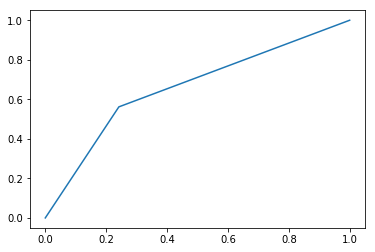

In [104]:
plt.plot(false_positive_rate,true_positive_rate)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

         0.0       0.86      0.76      0.80     21879
         1.0       0.40      0.56      0.47      6296

    accuracy                           0.71     28175
   macro avg       0.63      0.66      0.64     28175
weighted avg       0.76      0.71      0.73     28175

